In [66]:
# Load dependencies
import numpy as np
import pandas as pd
import seaborn as sns

In [67]:
# Helper functions
def clean_cols(cols):
    return [col.lower() for col in cols]

In [68]:
file_path = "C:/Users/domen/github/pokemon_classification/datasets/Pokemon.csv"

df = pd.read_csv(file_path)
df.columns = clean_cols(df.columns)

In [69]:
df.head(4)

,pokedex no.,name,type,other type,hp,attack,defense,special attack,special defense,speed,total,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex no.      1045 non-null   int64 
 1   name             1045 non-null   object
 2   type             1045 non-null   object
 3   other type       553 non-null    object
 4   hp               1045 non-null   int64 
 5   attack           1045 non-null   int64 
 6   defense          1045 non-null   int64 
 7   special attack   1045 non-null   int64 
 8   special defense  1045 non-null   int64 
 9   speed            1045 non-null   int64 
 10  total            1045 non-null   int64 
 11  generation       1045 non-null   int64 
 12  legendary        1045 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 106.3+ KB


As we had guessed, there is quite a significant class imbalance in the dataset. Less than 10% of the Pokemon are legendary.

In [71]:
print("-- pct")
print(df.legendary.value_counts(normalize=True))
print("-- counts")
print(df.legendary.value_counts())


-- pct
0    0.878469
1    0.121531
Name: legendary, dtype: float64
-- counts
0    918
1    127
Name: legendary, dtype: int64


array([[<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'special attack'}>],
       [<AxesSubplot:title={'center':'special defense'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

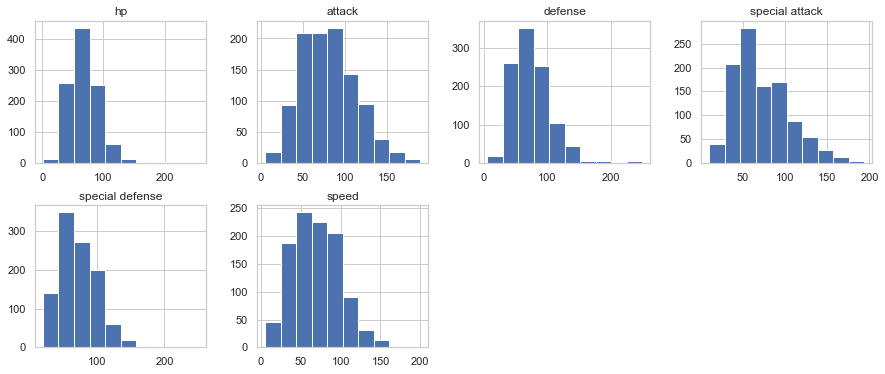

In [73]:
numerical = ['hp', 'attack', 'defense', 'special attack', 'special defense', 'speed']
df[numerical].hist(figsize=(15,6), layout=(2,4))

[Text(0.5, 1.0, 'total stats by Pokemon generation')]

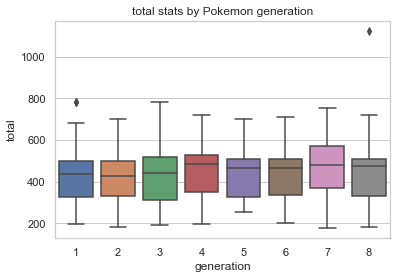

In [74]:
sns.boxplot(x=df.generation, y=df.total).set(title="total stats by Pokemon generation")

[Text(0.5, 1.0, 'total stats by Pokemon generation - no legendaries')]

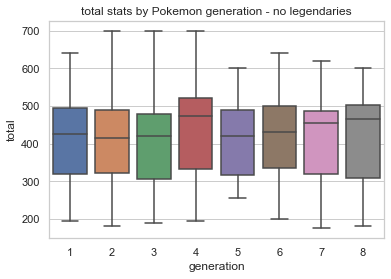

In [75]:
no_legendary_df = df[df.legendary==False]
(sns.boxplot(
    x=no_legendary_df.generation,
    y=no_legendary_df.total)
    .set(title="total stats by Pokemon generation - no legendaries"))


[Text(0.5, 1.0, 'total stats by Pokemon generation - only legendaries')]

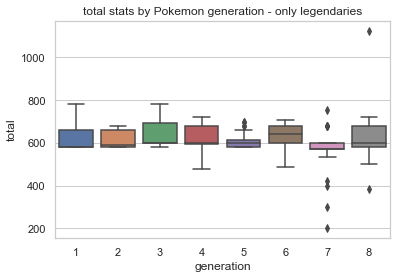

In [76]:
legendary_df = df[df.legendary==True]
(sns.boxplot(
    x=legendary_df.generation,
    y=legendary_df.total)
    .set(title="total stats by Pokemon generation - only legendaries"))


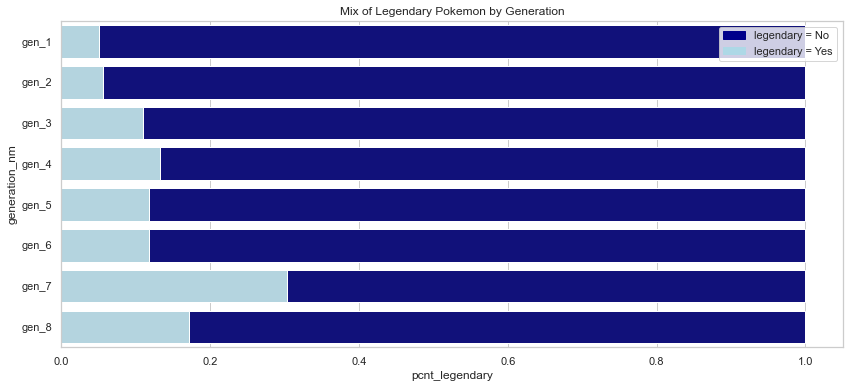

In [77]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
#poke = sns.load_dataset(df)

# set the figure size
plt.figure(figsize=(14, 6))

# from raw value to percentage
df[['generation_nm']] = 'gen_' + df['generation'].astype(str)
pokemon = df.groupby('generation_nm')['name'].count().reset_index()
legendary = df[df.legendary==True].groupby('generation_nm')['legendary'].count().reset_index()
poke = pokemon.merge(legendary, how = "left", on = "generation_nm")
poke[["pcnt_legendary"]] = round(poke.legendary / poke.name, 4)
poke[["all"]] = 1


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="generation_nm",  x="all", data=poke, color="darkblue").set_title("Mix of Legendary Pokemon by Generation")
bar2 = sns.barplot(y="generation_nm",  x="pcnt_legendary", data=poke, color="lightblue")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='legendary = No')
bottom_bar = mpatches.Patch(color='lightblue', label='legendary = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Beause we have class imbalance, the following performance measures should be considered when evaluating our model:
- Confusion matrix
- Precision (exactness)
- Recall (completeness)
- F-score (weighted average of precision and recall)
- ROC curves (sensitivity and specificity)
- Kappa (or Cohen's kappa)